In [10]:
# Install apyori
!pip install apyori

In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
from io import StringIO

In [12]:
# Define the provided groceries_2.csv data
data = """
milk,bread,biscuit,oats,pancit canton,peanut butter,cheese,green tea,coffee,cinnamon,sugar
t,t,t,,,,,,,,
t,t,t,t,,,,,,,
,t,,,t,,,t,,,
t,t,,,,t,t,,,,
,,t,,,,t,t,,,
,t,,,t,,,t,,,
,,,t,,,t,t,,,
,t,t,,,,t,t,,,
,t,,,,t,t,t,,,
t,t,,,,,,,,,
,,t,t,,,,,t,t,
,,t,t,,,,,t,t,
,,,,t,,,,t,,t
,t,,,,,,,t,t,
,t,t,,,,,,,,t
,,,t,,,,,t,,t
,t,,,t,,,,,,t
,t,,,,,,,t,,t
,t,,,,,,,t,,t
t,,,t,,,,t,t,,
"""

In [13]:
# Read the CSV data
df = pd.read_csv(StringIO(data))

In [14]:
# Convert DataFrame to transactions list
transactions = []
for _, row in df.iterrows():
    transaction = [col for col in df.columns if row[col] == 't']
    if transaction:
        transactions.append(transaction)

In [15]:
# Display sample of transactions
print("Sample of Transactions (First 5):")
for i, tx in enumerate(transactions[:5], 1):
    print(f"Transaction {i}: {', '.join(tx)}")

Sample of Transactions (First 5):
Transaction 1: milk, bread, biscuit
Transaction 2: milk, bread, biscuit, oats
Transaction 3: bread, pancit canton, green tea
Transaction 4: milk, bread, peanut butter, cheese
Transaction 5: biscuit, cheese, green tea


In [16]:
# Apply Apriori Algorithm with adjusted parameters for smaller dataset
rules = apriori(transactions, min_support=0.1, min_confidence=0.5, min_lift=1.2, min_length=2, max_length=3)

# Process rules into a list of dictionaries
results = []
for rule in rules:
    for ordered_stat in rule.ordered_statistics:
        items_base = list(ordered_stat.items_base)
        items_add = list(ordered_stat.items_add)
        if items_base and items_add:
            results.append({
                'rule': f"{', '.join(items_base)} → {', '.join(items_add)}",
                'support': rule.support,
                'confidence': ordered_stat.confidence,
                'lift': ordered_stat.lift
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

In [17]:
# Display rules table
print("\nAssociation Rules:")
if not results_df.empty:
    print(results_df[['rule', 'support', 'confidence', 'lift']].to_string(index=False))
else:
    print("No rules found with the given parameters.")


Association Rules:
                            rule  support  confidence     lift
              cinnamon → biscuit     0.10    0.666667 1.904762
                  oats → biscuit     0.15    0.500000 1.428571
                    milk → bread     0.20    0.800000 1.230769
           peanut butter → bread     0.10    1.000000 1.538462
              cheese → green tea     0.20    0.800000 2.285714
              green tea → cheese     0.20    0.571429 2.285714
          peanut butter → cheese     0.10    1.000000 4.000000
               cinnamon → coffee     0.15    1.000000 2.500000
                 cinnamon → oats     0.10    0.666667 2.222222
                   coffee → oats     0.20    0.500000 1.666667
                   oats → coffee     0.20    0.666667 1.666667
                  coffee → sugar     0.20    0.500000 1.666667
                  sugar → coffee     0.20    0.666667 1.666667
       pancit canton → green tea     0.10    0.500000 1.428571
           pancit canton → sugar   

In [18]:
# Highlight an interesting fact
if not results_df.empty:
    top_rule = results_df.loc[results_df['confidence'].idxmax()]
    print("\nInteresting Fact:")
    print(f"The rule '{top_rule['rule']}' has a high confidence of {top_rule['confidence']:.2%}, "
          f"indicating that when {top_rule['rule'].split(' → ')[0]} are purchased, "
          f"{top_rule['rule'].split(' → ')[1]} is also likely to be bought, "
          f"with a lift of {top_rule['lift']:.2f}.")


Interesting Fact:
The rule 'peanut butter → bread' has a high confidence of 100.00%, indicating that when peanut butter are purchased, bread is also likely to be bought, with a lift of 1.54.


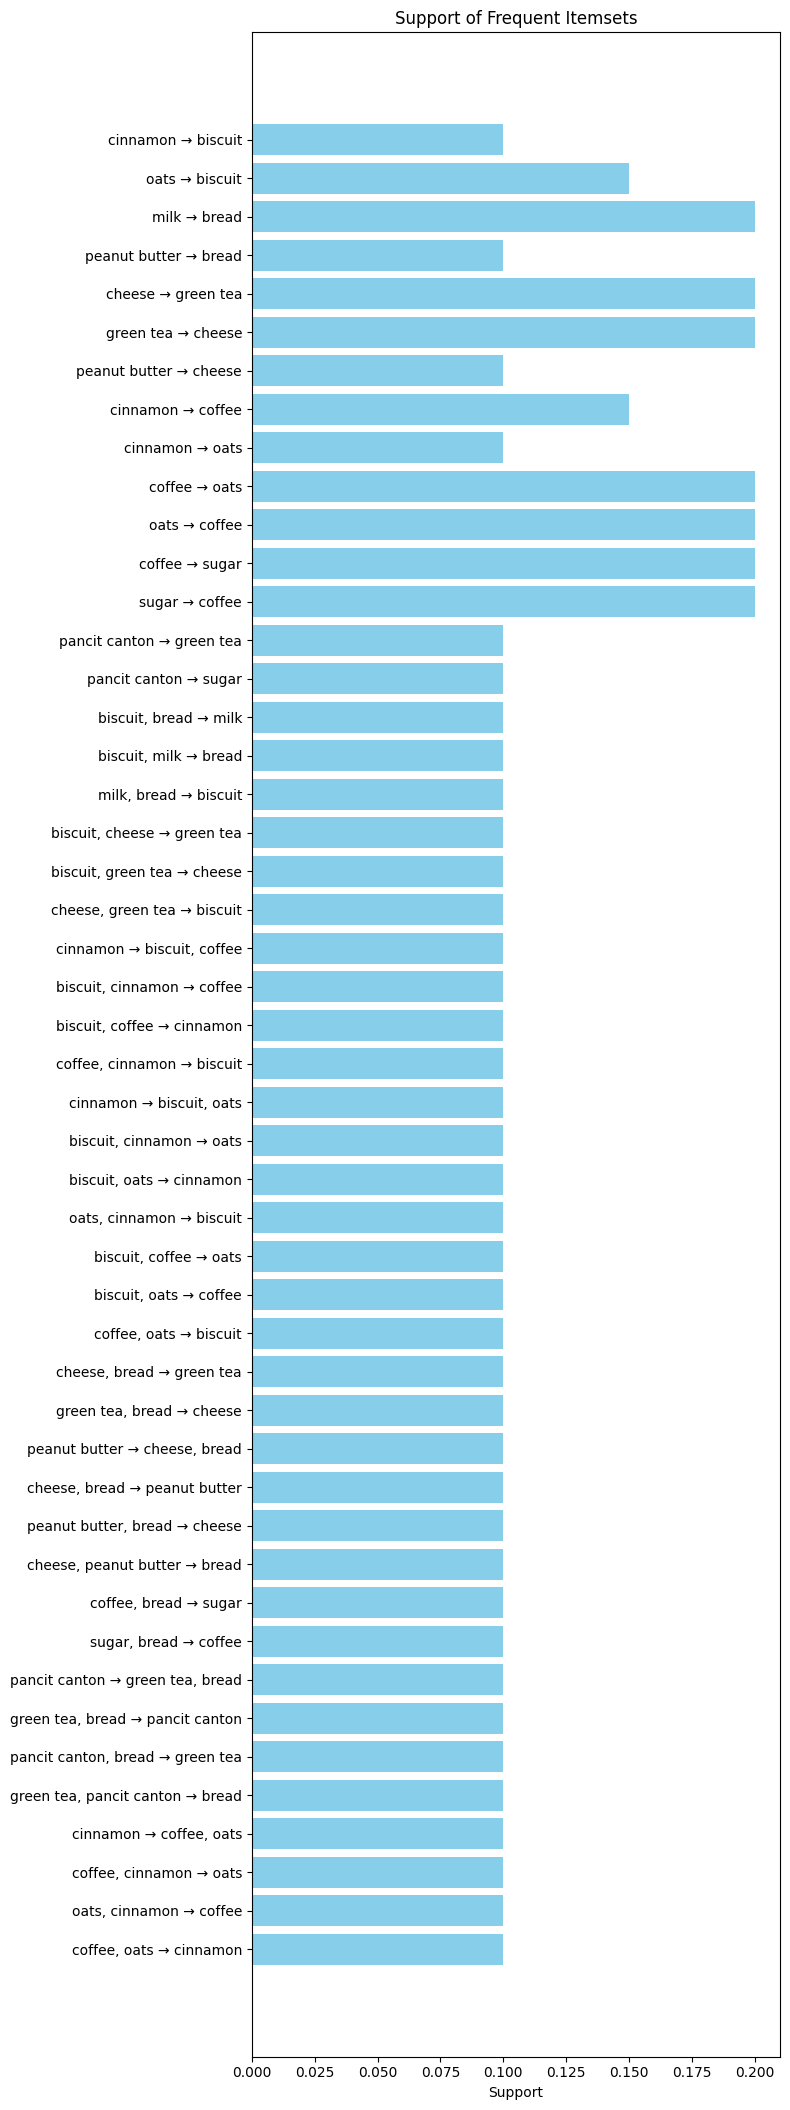

In [19]:
# Visualization 1: Support of Frequent Itemsets
if not results_df.empty:
    plt.figure(figsize=(8, len(results_df) * 0.4 + 2))
    plt.barh(results_df['rule'], results_df['support'], color='skyblue')
    plt.xlabel('Support')
    plt.title('Support of Frequent Itemsets')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

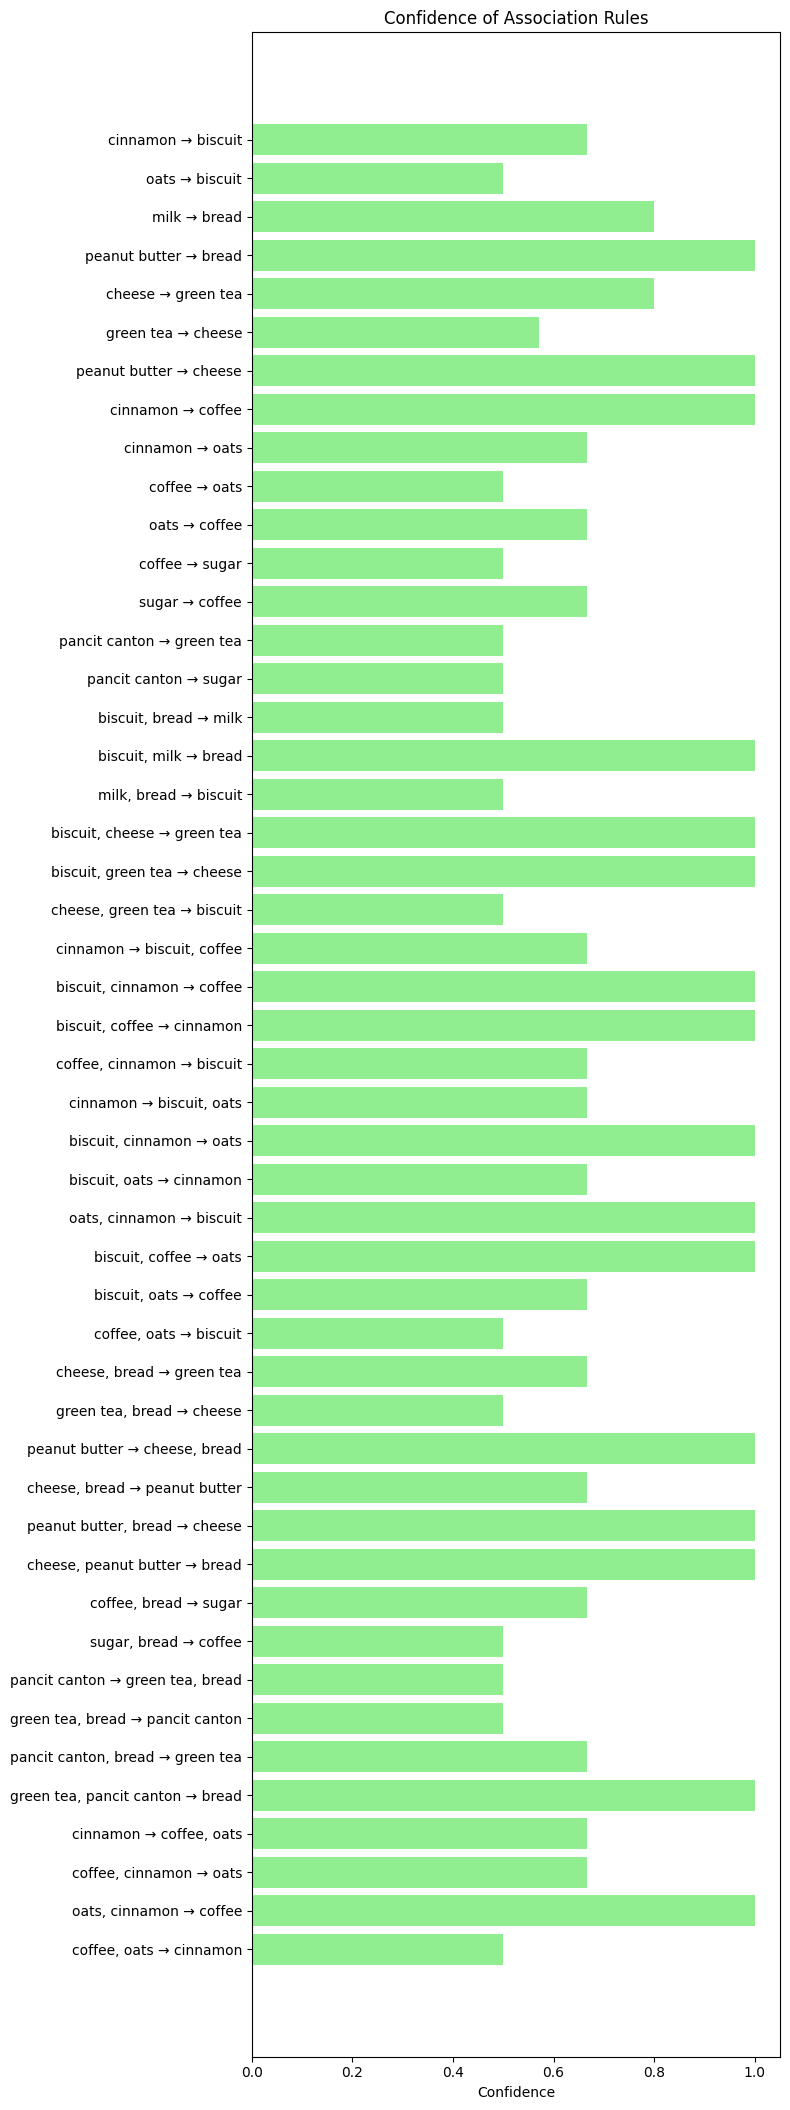

In [20]:
# Visualization 2: Confidence of Association Rules
if not results_df.empty:
    plt.figure(figsize=(8, len(results_df) * 0.4 + 2))
    plt.barh(results_df['rule'], results_df['confidence'], color='lightgreen')
    plt.xlabel('Confidence')
    plt.title('Confidence of Association Rules')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()